## dir 제작 및 데이터 받기

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

이 데이터셋은 25,000개의 강아지와 고양이 이미지(클래스마다 12,500개)를 담고 있고 (압축해서) 543MB 크기이다. 다운로드하고 압축을 해제한 후 세 개의 서브셋이 들어 있는 새로운 데이터셋을 만들 것이다. 클래스마다 1,000개의 샘플로 이루어진 훈련 세트, 클래스마다 500개의 샘플로 이루어진 검증 세트, 클래스마다 500개의 샘플로 이루어진 테스트 세트이다.



In [4]:
import os, shutil

In [5]:
original_dataset_dir = "datasets/cats_and_dogs/train/"

base_dir = "datasets/cats_and_dogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dog')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print("tarin cat image len : ", len(os.listdir(train_cats_dir)))

print("tarin dog image len : ", len(os.listdir(train_dogs_dir)))

print("test cat image len : ", len(os.listdir(test_cats_dir)))

tarin cat image len :  1000
tarin dog image len :  1000
test cat image len :  500


## 고양이와 강아지 찾기

In [7]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [11]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

1. 사진 파일 읽기
2. JPEG -> RGB 픽셀로 디코딩
3. 부동 소수 타입의 텐서로 변환
4. 피셀 값 0~255을 0~1 사이로 조정

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size=20,
    class_mode='binary')

validation_genrator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print("batch data size : ", data_batch.shape)
    print("batch label size : ", labels_batch.shape)
    break

batch data size :  (20, 150, 150, 3)
batch label size :  (20,)


In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_genrator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 53s 528ms/step - loss: 0.6853 - acc: 0.5485 - val_loss: 0.7077 - val_acc: 0.5160
Epoch 2/30
100/100 [==============================] - 56s 560ms/step - loss: 0.6494 - acc: 0.6200 - val_loss: 0.6334 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 53s 527ms/step - loss: 0.6058 - acc: 0.6675 - val_loss: 0.6115 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 52s 524ms/step - loss: 0.5682 - acc: 0.7085 - val_loss: 0.5920 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 52s 522ms/step - loss: 0.5334 - acc: 0.7345 - val_loss: 0.6805 - val_acc: 0.6410
Epoch 6/30
100/100 [==============================] - 53s 531ms/step - loss: 0.5119 - acc: 0.7495 - val_loss: 0.5829 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 53s 534ms/step - loss: 0.4792 - acc: 0.7645 - val_loss: 0.5569 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 5

In [14]:
model.save('cats_and_dogs_small_1.h5')

In [17]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

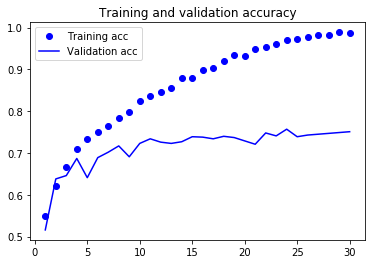

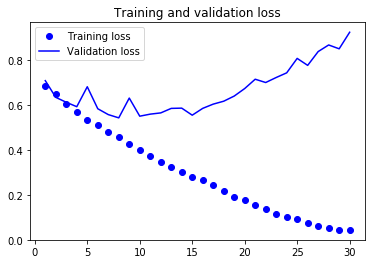

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show

## 데이터 증식 이용

In [14]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

* `rotation_range`는 랜덤하게 사진을 회전시킬 각도 범위이다.(0-180 사이).
* `width_shift_range`와 `height_shift_range`는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위이다.(전체 넓이와 높이에 대한 비율)
* `shear_range`는 랜덤하게 전단 변환을 적용할 각도 범위이다.
* `zoom_range`는 랜덤하게 사진을 확대할 범위이다.
* `horizontal_flip`은 랜덤하게 이미지를 수평으로 뒤집는다. 수평 대칭을 가정할 수 있을 때 사용한다(예를 들어, 풍경/인물 사진)
* `fill_mode`는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략


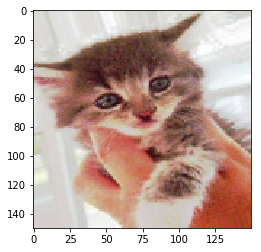

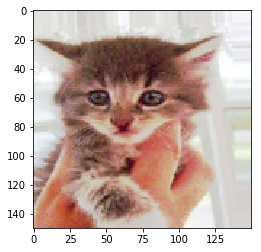

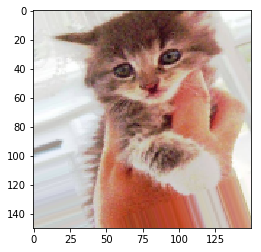

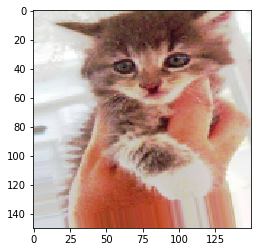

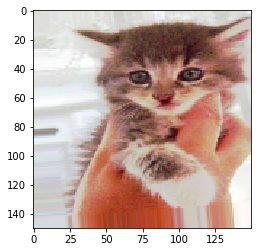

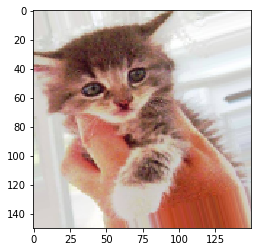

In [18]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for 
                fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break
        
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(23, (3,3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 74s 741ms/step - loss: 0.6940 - acc: 0.5100 - val_loss: 0.6824 - val_acc: 0.5216
Epoch 2/100
100/100 [==============================] - 76s 757ms/step - loss: 0.6785 - acc: 0.5778 - val_loss: 0.6586 - val_acc: 0.6205
Epoch 3/100
100/100 [==============================] - 76s 760ms/step - loss: 0.6654 - acc: 0.5959 - val_loss: 0.6491 - val_acc: 0.6206
Epoch 4/100
100/100 [==============================] - 76s 760ms/step - loss: 0.6454 - acc: 0.6206 - val_loss: 0.6909 - val_acc: 0.5477
Epoch 5/100
100/100 [==============================] - 76s 759ms/step - loss: 0.6366 - acc: 0.6300 - val_loss: 0.6094 - val_acc: 0.6783
Epoch 6/100
100/100 [==============================] - 75s 747ms/step - loss: 0.6239 - acc: 0.6438 - val_loss: 0.5905 - val_acc: 0.6920
Epoch 7/100
100/100 [==============================] - 76s 756ms/step - loss: 0.6051 - acc: 0.6625 -

In [32]:
model.save('cat_ang_dogs_small_2.h5')

<function matplotlib.pyplot.show(*args, **kw)>

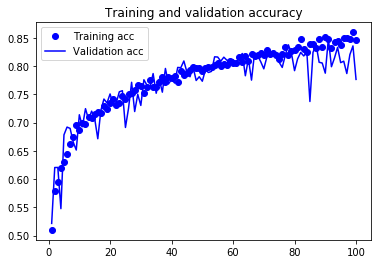

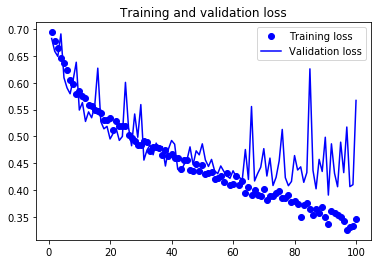

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show

In [38]:
max(val_acc)

0.8485824742268041

In [36]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc : ', test_acc)

Found 1000 images belonging to 2 classes.
test acc :  0.7859999978542328
